In [18]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from src.constants.directions import *
from src.constants.style import *
import pandas as pd
import time
from pathlib import Path
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(MATCHES_DIR, delimiter=',',encoding='utf-8')

## Top 10 de palabras que se encuentran primero de todas las partidas

In [20]:
correct_options = df[df["state"]=="ok"]
correct_keys = correct_options["correct"].unique()
corrects_quantity = correct_options.groupby(["correct"]).size()
corrects_time = correct_options[["correct","time_elapsed"]]
tam = len(corrects_time)
for x in correct_keys:
    total = 0
    for i in range(0,tam):
        actual = corrects_time.iloc[i]
        if actual["correct"]==x:
            total += round(float(actual["time_elapsed"]),2)
    corrects_quantity[x]=total/corrects_quantity[x]
corrects_quantity.sort_values(ascending=True).head(10)

if (len( corrects_quantity)==0):
    print ('NO HUBO PALABRAS ADIVINADAS')
else:
    print ("Las 10 palabras que se adivinan primero en todas las partidas son las siguientes (a la izquierda la palabra, a la derecha los segundos en promedio que tarda en ser adivinada):")
    print(corrects_quantity.sort_values().tail(10))


Las 10 palabras que se adivinan primero en todas las partidas son las siguientes (a la izquierda la palabra, a la derecha los segundos en promedio que tarda en ser adivinada):
correct
Bruno Mars    0.19
dtype: float64


## Gráfico que muestre el porcentaje de partidas finalizadas según género.


<function matplotlib.pyplot.show(close=None, block=None)>

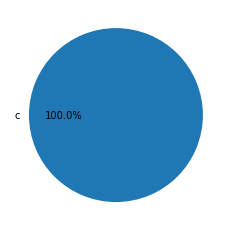

In [21]:
data_json = pd.read_json(USERS_DIR)

generos_nicks = data_json[['nick','gender']]
jugadores = df['player'].tolist()
eventos=df['event'].tolist()
nicks=[]
tamaño=len(df)
for i in range (0,tamaño):
    if(eventos[i] == 'match_ended'):
        nicks.append((jugadores[i]))
generos_nicks=generos_nicks.values.tolist()
dict_generos_nicks = {}
for i in generos_nicks:
    dict_generos_nicks[i[0]] = i[1]
final_dict = {}
for i in nicks:
    try:
        final_dict[dict_generos_nicks[i]] += 1
    except KeyError:
        final_dict[dict_generos_nicks[i]] = 1
plt.pie(final_dict.values(),labels=final_dict.keys(),autopct='%1.1f%%')
plt.show

## Grafico que muestre el porcentaje de partidas finalizadas segun nivel:

<function matplotlib.pyplot.show(close=None, block=None)>

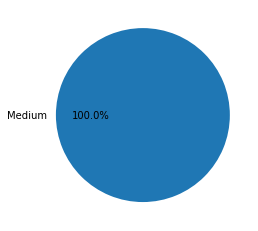

In [22]:

eventos_nivel=df[(df['event'] =='match_ended')]
eventos_nivel = eventos_nivel['level'].value_counts()
plt.pie(eventos_nivel.values,labels=eventos_nivel.keys(),autopct='%1.1f%%')
plt.show

## Duración total de la partida (desde que el usuarie empieza a jugar hasta que presiona salir o pasan las N rondas definidas para el nivel de dificultad actual).

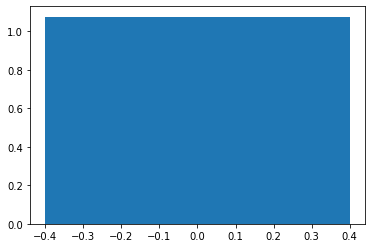

In [23]:
eventos=df['event'].tolist()
estado=df['state'].tolist()
tiempos_totales=df['time_elapsed']
ids=df['id']
ids_tiempos=[]
tiempototal=0
tamaño=len(df)
for i in range(1,tamaño):
    if(eventos[i] == 'guess_made'): 
        tiempototal+=float(tiempos_totales[i])
    elif(eventos[i] == 'match_started'):
        tiempototal=0
    elif(eventos[i] == 'match_ended'):
        ids_tiempos.append((tiempototal, ids[i]))

#ids_tiempos_sort=ids_tiempos.sort(key=lambda y: y[1])
rango=range(0,len(ids_tiempos))
plt.bar(rango,list(map(lambda x: x[0],ids_tiempos)))
plt.show()

## Tiempo de la respuesta exitosa mas rápida

In [24]:
df= pd.read_csv(MATCHES_DIR, encoding='utf-8')
tiempos_totales=df['time_elapsed']
eventos=df['event'].tolist()
estado=df['state'].tolist()
tamaño=len(df)
t_exitoso=90
t_act=0
for i in range(1,tamaño):
    if (eventos[i] == 'guess_made') and (estado[i] == 'ok' ):
        t_act = float(tiempos_totales[i])
        if (t_act < t_exitoso): 
            t_exitoso = t_act
print(f"Respuesta exitosa mas rapida: {round(t_exitoso,2)} segundos")

Respuesta exitosa mas rapida: 0.19 segundos


## Promedio de tiempo de respuestas para respuestas exitosas

In [25]:
usuarios=df['player'].unique().tolist()
promedio_correctas=0
correctas=df[['player','event','state','time_elapsed']]
correctas=correctas[(correctas['event'] == "guess_made") & (df['state']=="ok")]
correctas['time_elapsed']=correctas['time_elapsed'].astype(float,errors='raise')
for i in usuarios:
        if(len(correctas[correctas['player']==i]))!=0:
            usuario_act=(correctas[correctas['player']==i])
            promedio_correctas+=usuario_act['time_elapsed'].mean()
    
print (f"Promedio de tiempo de respuestas para respuestas exitosas: {round(promedio_correctas,2)} segundos")
    
    

Promedio de tiempo de respuestas para respuestas exitosas: 0.19 segundos


## Promedio de tiempo de partida general.


In [26]:
def segundos_a_segundos_minutos_y_horas(segundos):

    minutos = int(segundos/60)
    segundos -= minutos*60
    return minutos,segundos

tamano=len(df)
df_tiempo=df[['event','time_elapsed']]
tiempo_total=0
tiempo_act=0
partidas_completadas=0
for i in range (0,tamano):
    fila_act=df_tiempo.iloc[i]
    if (fila_act['event'] == 'match_started'):
        tiempo_act=0
    elif (fila_act['event'] == 'match_ended'):
        tiempo_total+=tiempo_act
        partidas_completadas+=1
    elif (fila_act['event'] == 'guess_made'):
            tiempo_act+=float(fila_act['time_elapsed'])
    
        
promedio_partidas=tiempo_total/partidas_completadas
minutos,segundos=segundos_a_segundos_minutos_y_horas(int(promedio_partidas))
print (f"Promedio de tiempo de partida general: {minutos} minutos y {segundos} segundos")


Promedio de tiempo de partida general: 0 minutos y 1 segundos


## Porcentaje de aciertos por usuario

In [27]:

df_porcentajes=df[['player','event','state']]
df_porcentajes=df_porcentajes[df_porcentajes['event']=='guess_made']

dic_aciertos={}

for i in usuarios:
    usuario_act=(df_porcentajes[df_porcentajes['player']==i])
    respuestas=usuario_act['state'].value_counts()
    try:
        aciertos=respuestas['ok']
    except KeyError:
        aciertos=0
    porcentaje = round((aciertos/len(usuario_act))*100,2) if len(usuario_act)!=0 else 0
    dic_aciertos[i]=porcentaje
    dic_aciertos[i]=f"{porcentaje}%"
for clave in dic_aciertos:
    print (f'El usuario {clave} tiene un porcentaje de aciertos de {dic_aciertos[clave]}')


El usuario b tiene un porcentaje de aciertos de 50.0%


## Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).


In [28]:
dic_timeout={}
df_timeout=df[['player','event']]
for i in usuarios:
    usuario_act=(df_timeout[df_timeout['player']==i])
    timeout=(usuario_act[usuario_act['event']=='timeout'])
    dic_timeout[i]=len(timeout)
    
for clave in dic_timeout:

    print (f'El usuario {clave} no dio respuesta a {dic_timeout[clave]} preguntas')
    

El usuario b no dio respuesta a 0 preguntas


## Cantidad de tarjetas en las que el usuarie dió una respuesta errónea.


In [29]:
dic_errores={}
df_errores=df[['player','event','state']]
for i in usuarios:
    usuario_act=(df_errores[df_errores['player']==i])
    errores=(usuario_act[(usuario_act['event']=='guess_made') & (usuario_act['state']=='error')])
    dic_errores[i]=len(errores)
    
for clave in dic_errores:
    print (f'El usuario {clave} dio una respuesta erronea a {dic_errores[clave]} preguntas')
    

El usuario b dio una respuesta erronea a 1 preguntas


## Gráfico que muestre el porcentaje de partidas que se juegan para cada día de la semana

<function matplotlib.pyplot.show(close=None, block=None)>

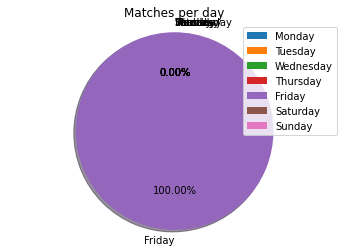

In [30]:
###Matches per day 
from matplotlib import pyplot as plt
%matplotlib inline

def day_matches(df,day):
    """This function tries to access
    the data from the dataframe and
    get the matches of the day.
    Returns zero if can´t access a day that 
    doesn´t exist on the DataFrame
    """
    try: 
        return df[day]
    except KeyError:
        return 0
    
dates = df["timestamp"]
string_dates = list(map(lambda x:time.ctime(x),dates))
string_dates = list(map(lambda x:x[:3],string_dates))

datos = {
    'dias':string_dates
}
days = pd.DataFrame(data=datos)
days = days.groupby(['dias']).size()

Monday_matches = day_matches(days,"Mon")
Tuesday_matches = day_matches(days,"Tue")
Wednesday_matches = day_matches(days,"Wed")
Thursday_matches = day_matches(days,"Thu")
Friday_matches = day_matches(days,"Fri")
Saturday_matches = day_matches(days,"Sat")
Sunday_matches = day_matches(days,"Sun")

labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
data_graphic =[
    Monday_matches, Tuesday_matches, Wednesday_matches, Thursday_matches, Friday_matches, Saturday_matches, Sunday_matches 
] 

plt.pie(data_graphic,  labels=labels, autopct='%1.2f%%',
shadow=True, startangle=90, labeldistance= 1.1)
plt.axis('equal')
plt.legend(labels)
plt.title("Matches per day")
plt.show


## Promedio de tiempo de partidas finalizadas por nivel.


In [31]:


def nivel_ended_game_time(df):
    try:
        tamano = len(df)
        df_seconds = df[["event","time_elapsed"]]

        tiempo_actual=0
        tiempo_total=0
        partidas_completadas=0
        for x in  range(0,tamano):
            actual = df_seconds.iloc[x]
            if(actual["event"]=="match_started"):
                tiempo_actual = 0
            elif(actual["event"]=="match_ended"):
                tiempo_total += tiempo_actual
                partidas_completadas+=1
            elif (actual["event"] == "guess_made"):

                tiempo_actual+=round(float(actual["time_elapsed"]),2)
        if tiempo_total==0:
            return 0
        else:
            return tiempo_total/partidas_completadas

    except KeyError:
        return 0
easy = df[(df['level']=="Easy")]
m_ended_time = nivel_ended_game_time(easy)
minutos,segundos=segundos_a_segundos_minutos_y_horas(int(m_ended_time))
print(f"El promedio de tiempo de partidas finalizadas en el nivel Facil es de  {minutos} minutos y {segundos} segundos")

medium = df[(df['level']=="Medium")]
m_ended_time = nivel_ended_game_time(medium)
minutos,segundos=segundos_a_segundos_minutos_y_horas(int(m_ended_time))
print(f"El promedio de tiempo de partidas finalizadas en el nivel Medio es de  {minutos} minutos y {segundos} segundos")

hard = df[(df['level']=="Hard")]
m_ended_time = nivel_ended_game_time(hard)
minutos,segundos=segundos_a_segundos_minutos_y_horas(int(m_ended_time))
print(f"El promedio de tiempo de partidas finalizadas en el nivel Dificil es de  {minutos} minutos y {segundos} segundos")

El promedio de tiempo de partidas finalizadas en el nivel Facil es de  0 minutos y 0 segundos
El promedio de tiempo de partidas finalizadas en el nivel Medio es de  0 minutos y 1 segundos
El promedio de tiempo de partidas finalizadas en el nivel Dificil es de  0 minutos y 0 segundos


## Porcentaje de palabras encontradas en las partidas “timeout, es decir que finalizaron por falta de tiempo para completar.


<function matplotlib.pyplot.show(close=None, block=None)>

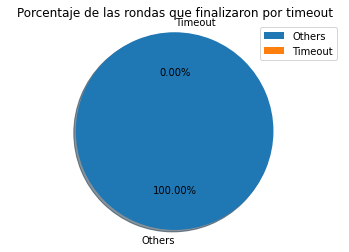

In [32]:
def event(df,event):
    try:
        return partidas[event]
    except KeyError:
        return 0
    
partidas = df.groupby(["event"]).size()

labels=["Others","Timeout"]

data_graphic =[
    df["event"].count(),event(partidas,"timeout") 
] 

plt.pie(data_graphic,  labels=labels, autopct='%1.2f%%',
shadow=True, startangle=90, labeldistance= 1.1)
plt.axis('equal')
plt.legend(labels)
plt.title("Porcentaje de las rondas que finalizaron por timeout")
plt.show